# Data Preprocessing

Для моделирования были получены данные по диагностике заболеваний. Исходный датасет имеет 10 переменных, одна из которых указывает на состояние в значениях 1-болен, 0-здоров.
На первом этапе осуществим подготовку данных. Сперва импортируем необходимые библиотеки, вторым шагом загрузим файл с данными в формате csv.

In [340]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [341]:
# Importing the dataset
df = pd.read_csv('kr2_gavr.csv', sep=',')

Для наглядности выведем импортрованнные данные на экран; убедимся, что всё загрузилось должным образом. Имеем 10 столбцов, 615 строк.

In [342]:
df

,Age,Sex,ALB,BIL,CHE,CHOL,CREA,GGT,PROT,Category
0,32,m,38.5,7.5,6.93,3.23,106.0,12.1,69.0,0
1,32,m,38.5,3.9,11.17,4.80,74.0,15.6,76.5,0
2,32,m,46.9,6.1,8.84,5.20,86.0,33.2,79.3,0
3,32,m,43.2,18.9,7.33,4.74,80.0,33.8,75.7,0
4,32,m,39.2,9.6,9.15,4.32,76.0,29.9,68.7,0
...,...,...,...,...,...,...,...,...,...,...
610,62,f,32.0,50.0,5.57,6.30,55.7,650.9,68.5,1
611,64,f,24.0,20.0,1.54,3.02,63.0,35.9,71.3,1
612,64,f,29.0,48.0,1.66,3.63,66.7,64.2,82.0,1
613,46,f,33.0,20.0,3.56,4.20,52.0,50.0,71.0,1


Построим графики распределения функций. Для асимметричных данных проведем логарифмирование:

C:\Users\User\anaconda3\envs\tensorflow_env\lib\site-packages\seaborn\axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


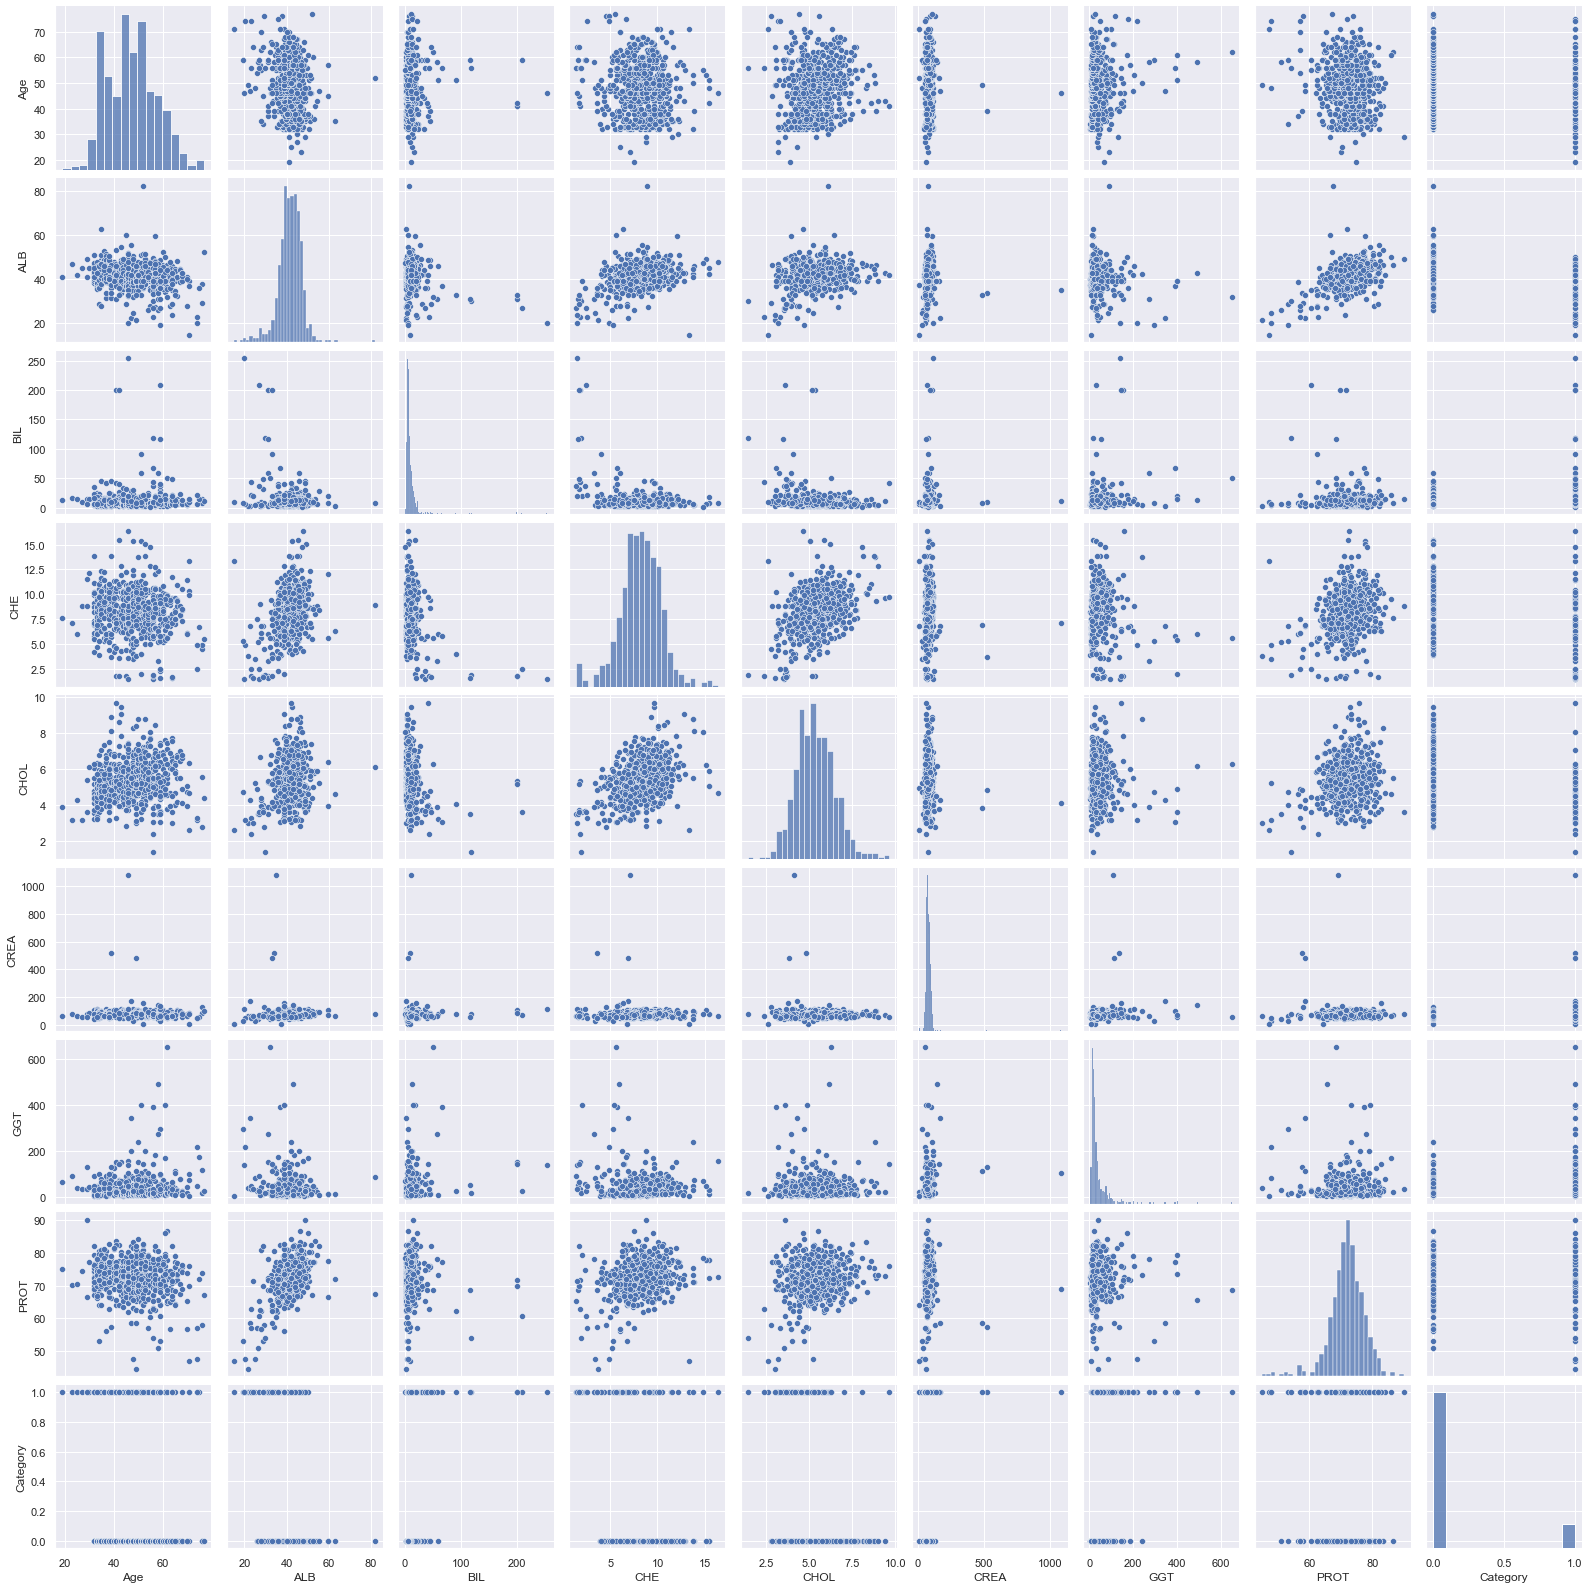

In [343]:
# Features distribution
import seaborn as sns
sns.set()
sns.pairplot(df, size = 2.5)
plt.show();

Произведем преобразование для искаженных распределений и продемонстрируем результат.

C:\Users\User\anaconda3\envs\tensorflow_env\lib\site-packages\seaborn\axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


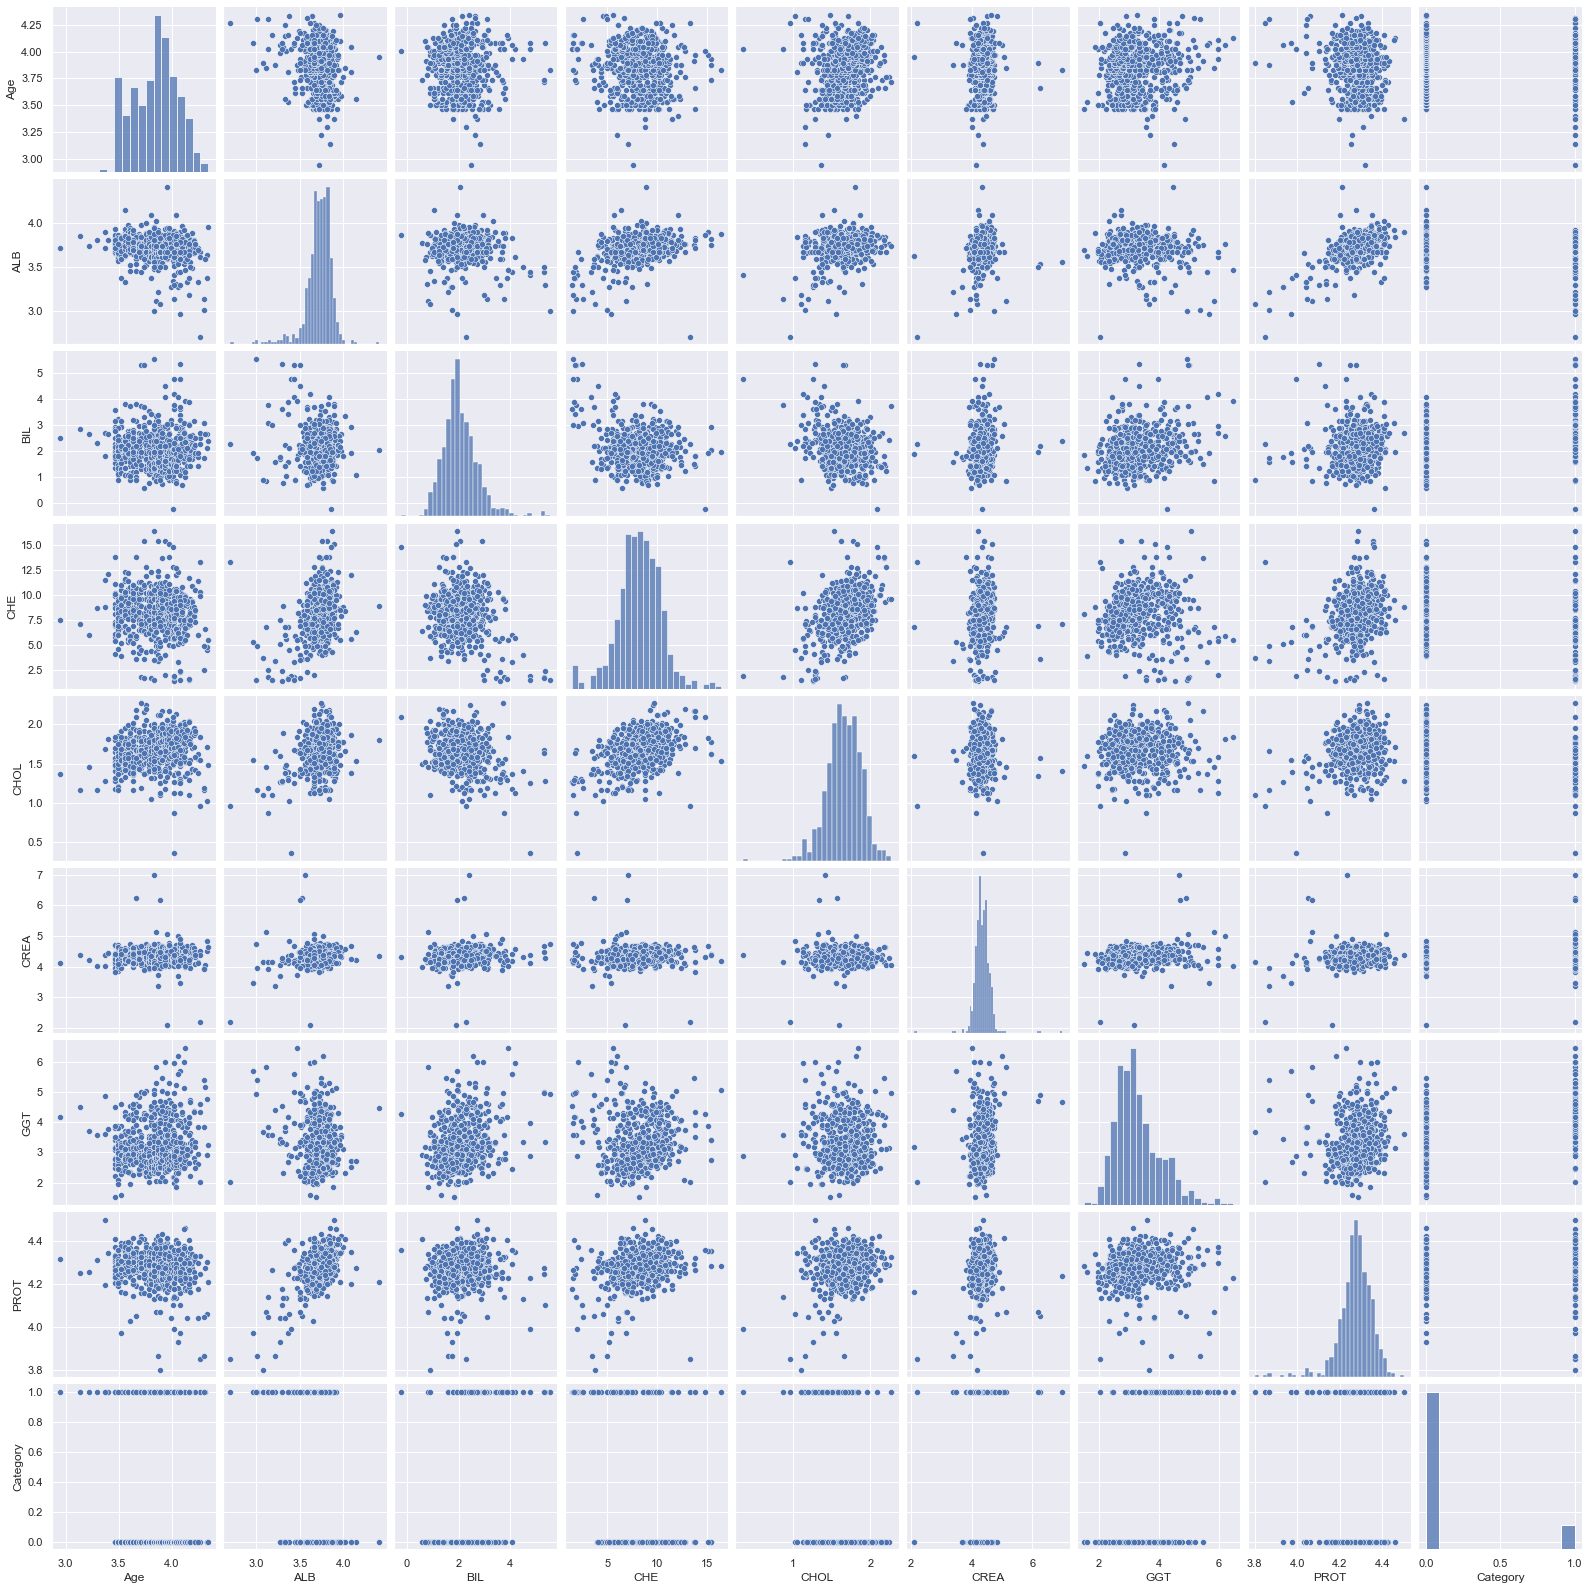

In [344]:
# Log Transformations for Skewed Distributions
df_1 = df.copy()
df_1[['Age',"ALB","BIL","CHOL","CREA","GGT","PROT"]] = np.log(df_1[['Age',"ALB","BIL","CHOL","CREA","GGT","PROT"]])
sns.set()
sns.pairplot(df_1, size = 2.5)
plt.show();

Выведем статистику по числовым переменным, где сразу увидим, что в переменных "ALB", "CHOL", "PROT" имеются пропущенные значения.

In [345]:
df.describe()

,Age,ALB,BIL,CHE,CHOL,CREA,GGT,PROT,Category
count,615.000000,614.000000,615.000000,615.000000,605.000000,615.000000,615.000000,614.000000,615.000000
mean,47.408130,41.620195,11.396748,8.196634,5.368099,81.287805,39.533171,72.044137,0.133333
std,10.055105,5.780629,19.673150,2.205657,1.132728,49.756166,54.661071,5.402636,0.340211
min,19.000000,14.900000,0.800000,1.420000,1.430000,8.000000,4.500000,44.800000,0.000000
25%,39.000000,38.800000,5.300000,6.935000,4.610000,67.000000,15.700000,69.300000,0.000000
50%,47.000000,41.950000,7.300000,8.260000,5.300000,77.000000,23.300000,72.200000,0.000000
75%,54.000000,45.200000,11.200000,9.590000,6.060000,88.000000,40.200000,75.400000,0.000000
max,77.000000,82.200000,254.000000,16.410000,9.670000,1079.100000,650.900000,90.000000,1.000000


Осуществим работы с выбросами в числовых переменных: для этого запишем функцию для поиска и замены данных, выходящих за пределы 3 сигма. 

In [346]:
# Function Outliers
def outliers(df):
    num_var = list(df._get_numeric_data().columns)
    for col_names in num_var:
        df[col_names] = df[col_names].apply(lambda y: df[col_names].mean()-3*df[col_names].std() 
                            if y < df[col_names].mean()-3*df[col_names].std() else y)
        df[col_names] = df[col_names].apply(lambda y: df[col_names].mean()+3*df[col_names].std() 
                            if y > df[col_names].mean()+3*df[col_names].std() else y)
    return(df)

Запишем в наш датафрейм уже очищенные от  выбросов переменные и повторно выведем статистику.
В результате выполнения очистки можно наблядать, что показатели максимального, минимального, среднего значений, а также стандартного отклонения изменились прктически по всем переменным (кроме "Age") и соответствуют нормальному распределению, что говорит об отсутствии выбросов.

In [347]:
# Outliers
df = outliers(df)
df.describe()

,Age,ALB,BIL,CHE,CHOL,CREA,GGT,PROT,Category
count,615.000000,614.000000,615.000000,615.000000,605.000000,615.000000,615.000000,614.000000,615.000000
mean,47.408130,41.619034,10.263274,8.191132,5.365605,79.023852,36.816201,72.117792,0.133333
std,10.055105,5.368663,10.138949,2.184622,1.118583,19.472858,37.237116,5.090528,0.340211
min,19.000000,24.278307,0.800000,1.579662,1.969914,8.000000,4.500000,55.836230,0.000000
25%,39.000000,38.800000,5.300000,6.935000,4.610000,67.000000,15.700000,69.300000,0.000000
50%,47.000000,41.950000,7.300000,8.260000,5.300000,77.000000,23.300000,72.200000,0.000000
75%,54.000000,45.200000,11.200000,9.590000,6.060000,88.000000,40.200000,75.400000,0.000000
max,77.000000,58.495497,70.416197,14.809541,8.758481,230.556303,203.516384,87.434438,1.000000


Проведем проверку типов данных по переменным и выявим соответствие.

In [348]:
df.dtypes

Age           int64
Sex          object
ALB         float64
BIL         float64
CHE         float64
CHOL        float64
CREA        float64
GGT         float64
PROT        float64
Category      int64
dtype: object

Следующим этапом подготовки данных будет проверка на наличие пропущенных значений.
Выведем общее количество и процент пропусков по переменным. Как было указано ранее, пропуски присутствуютв 3 переменных.

In [349]:
# Cheking Missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
CHOL,10,0.016260
PROT,1,0.001626
ALB,1,0.001626
Category,0,0.000000
GGT,0,0.000000
CREA,0,0.000000
CHE,0,0.000000
BIL,0,0.000000
Sex,0,0.000000
Age,0,0.000000


С помощью написанной ниже функции для числовых переменных заполняем пропуски средними значениями.

In [350]:
# Function Missing data (numeric)
def fill_missing_num(x):
    num_var = list(x._get_numeric_data().columns)
    for col_names in num_var:        
        prep_med = SimpleImputer(missing_values=np.nan, strategy='mean')
        prep_med.fit(x[num_var])
        x[num_var] = prep_med.transform(x[num_var])
    return(x)

Записываем в наш датафрейм уже очищенные данные.

In [351]:
# Filling NA 
from sklearn.impute import SimpleImputer
df = fill_missing_num(df)

Повторно делаем проверку, которая указывает на отсутствие пропусков в данных

In [352]:
# Cheking Missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
Category,0,0.0
PROT,0,0.0
GGT,0,0.0
CREA,0,0.0
CHOL,0,0.0
CHE,0,0.0
BIL,0,0.0
ALB,0,0.0
Sex,0,0.0
Age,0,0.0


Повторно выведем статистику и убедимся, что данные подготовлены и могут использоваться для моделирования.

In [353]:
df.describe()

,Age,ALB,BIL,CHE,CHOL,CREA,GGT,PROT,Category
count,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000
mean,47.408130,41.619034,10.263274,8.191132,5.365605,79.023852,36.816201,72.117792,0.133333
std,10.055105,5.364289,10.138949,2.184622,1.109437,19.472858,37.237116,5.086381,0.340211
min,19.000000,24.278307,0.800000,1.579662,1.969914,8.000000,4.500000,55.836230,0.000000
25%,39.000000,38.800000,5.300000,6.935000,4.620000,67.000000,15.700000,69.300000,0.000000
50%,47.000000,41.900000,7.300000,8.260000,5.310000,77.000000,23.300000,72.200000,0.000000
75%,54.000000,45.200000,11.200000,9.590000,6.055000,88.000000,40.200000,75.400000,0.000000
max,77.000000,58.495497,70.416197,14.809541,8.758481,230.556303,203.516384,87.434438,1.000000


Имеем подгоовленный набор данных, который можно далее использовать для моделирования.

# K-Means Clustering¶

Перейдем к работе с алгоритмом К-средних. 
Выведем на экран подготовленные данные.

In [354]:
df

,Age,Sex,ALB,BIL,CHE,CHOL,CREA,GGT,PROT,Category
0,32.0,m,38.500000,7.5,6.930000,3.23,106.0,12.100000,69.0,0.0
1,32.0,m,38.500000,3.9,11.170000,4.80,74.0,15.600000,76.5,0.0
2,32.0,m,46.900000,6.1,8.840000,5.20,86.0,33.200000,79.3,0.0
3,32.0,m,43.200000,18.9,7.330000,4.74,80.0,33.800000,75.7,0.0
4,32.0,m,39.200000,9.6,9.150000,4.32,76.0,29.900000,68.7,0.0
...,...,...,...,...,...,...,...,...,...,...
610,62.0,f,32.000000,50.0,5.570000,6.30,55.7,203.516384,68.5,1.0
611,64.0,f,24.278307,20.0,1.579662,3.02,63.0,35.900000,71.3,1.0
612,64.0,f,29.000000,48.0,1.660000,3.63,66.7,64.200000,82.0,1.0
613,46.0,f,33.000000,20.0,3.560000,4.20,52.0,50.000000,71.0,1.0


Перейдем к предварительной кодировке данных, для чего применим следующую функцию.

In [355]:
# Function Encoding
def encoding_char(x):
    char_var = list(set(x.columns) - set(x._get_numeric_data().columns))
    for col_names in char_var:
        f = pd.factorize(x[col_names])
        x[col_names] = pd.factorize(x[col_names])[0]
    return(x)

In [356]:
# Encoding categorical data
df = encoding_char(df)

In [357]:
df

,Age,Sex,ALB,BIL,CHE,CHOL,CREA,GGT,PROT,Category
0,32.0,0,38.500000,7.5,6.930000,3.23,106.0,12.100000,69.0,0.0
1,32.0,0,38.500000,3.9,11.170000,4.80,74.0,15.600000,76.5,0.0
2,32.0,0,46.900000,6.1,8.840000,5.20,86.0,33.200000,79.3,0.0
3,32.0,0,43.200000,18.9,7.330000,4.74,80.0,33.800000,75.7,0.0
4,32.0,0,39.200000,9.6,9.150000,4.32,76.0,29.900000,68.7,0.0
...,...,...,...,...,...,...,...,...,...,...
610,62.0,1,32.000000,50.0,5.570000,6.30,55.7,203.516384,68.5,1.0
611,64.0,1,24.278307,20.0,1.579662,3.02,63.0,35.900000,71.3,1.0
612,64.0,1,29.000000,48.0,1.660000,3.63,66.7,64.200000,82.0,1.0
613,46.0,1,33.000000,20.0,3.560000,4.20,52.0,50.000000,71.0,1.0


Отшкалируем данные, используя MinMaxScaler, переведя наши данные в диапазон от 0 до 1 с округлением. Вывыдем результат в таблицу, подписав соответственно названия столбцов.

In [358]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler().fit(df)
df = sc.transform(df)
pd.DataFrame(df, columns = ['Age',"Sex","ALB","BIL","CHE","CHOL","CREA","GGT","PROT","Category"]).round()

,Age,Sex,ALB,BIL,CHE,CHOL,CREA,GGT,PROT,Category
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
610,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
611,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
612,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
613,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


Для того, чтобы определиться с числом выделяемых кластеров, применим метод локтя, прогнав алгоритм в цикле от 1 до 8 кластеров.
На полученном графике видно, что наибольшая скорость падения наблюдается при выделении 2 кластеров, а также видимое падение при 3 и 4-х.

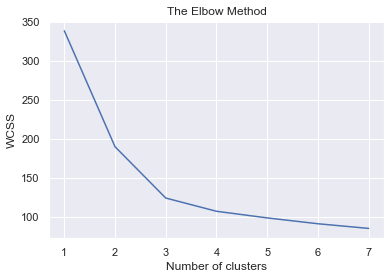

In [359]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 8):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 8), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Итак, чтобы более точно определиться с оптимальным количеством выделяемых кластеров, используем еще один метод силуэта, прогоним цикл от 2 до 8. Максимум показателя достигается на 3, 4 и 5 кластерах, однако на 5 он немного выше. Эти показатели приводят к решению выделить для дальнейшей работы все-таки 4 кластера.

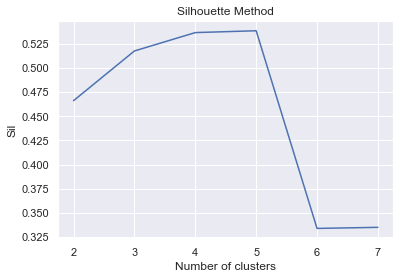

2:0.4661153021338405
3:0.5175355042015375
4:0.5365278257122613
5:0.5384405044456482
6:0.3340056653717684
7:0.3351255809966325


In [360]:
# Using the silhouette method to find the optimal number of clusters
from sklearn.metrics import silhouette_score

sil = []

for k in range(2, 8):
  kmeans = KMeans(n_clusters = k).fit(df)  
  preds = kmeans.fit_predict(df)
  sil.append(silhouette_score(df, preds, metric = 'euclidean'))


plt.plot(range(2, 8), sil)
plt.title('Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('Sil')
plt.show()

for i in range(len(sil)):
 print(str(i+2) +":"+ str(sil[i]))

Следующим шагом применим метод К-средних, выделив 4 кластера. Выведем таблицу с ядрами кластеров, округлив их значения. С помощь полученной таблицы мы можем оценить наши характеристики и понять, какие из них будут значимыми при построении модели кластеризации. Итак, мы видим что такие переменные как "BIL","CREA","GGT" мало вариативны по кластерам, поэтому эти данные будут точно исключены при дальнейшей работе с моделью. Вопрос вызывает переменная 'Sex', однако я решаю оставить данную характеристику.
Исходя из данной таблицы довольно сложно проинтерпритировать логическое разбиение на кластеры. Поэтому я просто оставлю в модели на мой взгляд самые существенные характеистики.

In [377]:
# Fitting K-Means to the dataset
km = KMeans(n_clusters = 4, init = 'k-means++', random_state = 0).fit_predict(df)
kms = KMeans(n_clusters = 4, random_state = 0).fit(df)
pd.DataFrame(kms.cluster_centers_, columns = ['Age',"Sex","ALB","BIL","CHE","CHOL","CREA","GGT","PROT","Category"]).round(2)

,Age,Sex,ALB,BIL,CHE,CHOL,CREA,GGT,PROT,Category
0,0.49,0.0,0.41,0.31,0.41,0.38,0.32,0.43,0.49,1.0
1,0.59,1.0,0.37,0.27,0.36,0.39,0.32,0.39,0.58,1.0
2,0.49,-0.0,0.55,0.13,0.54,0.52,0.35,0.15,0.53,0.0
3,0.48,1.0,0.49,0.09,0.48,0.52,0.28,0.09,0.49,0.0


Оставим в нашем наборе такие переменные: 'Age',"Sex","ALB","CHE","CHOL","PROT","Category".

In [362]:
# Less features
X = df[:, [0, 1, 2, 4, 5, 8, 9]]

Итак, теперь применим алгоритм К-средних, выделив уже 3 кластера(ля сопоставимости с моделью НС), но уже на отобранных данных. Проведем обучение на этом множестве и выведем ядра кластеров.

In [380]:
# Fitting K-Means to the dataset
km = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0).fit_predict(X)
kms = KMeans(n_clusters = 3, random_state = 0).fit(X)
pd.DataFrame(kms.cluster_centers_, columns = ['Age',"Sex","ALB","CHE","CHOL","PROT","Category"]).round(0)

,Age,Sex,ALB,CHE,CHOL,PROT,Category
0,0.0,-0.0,1.0,1.0,1.0,1.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,1.0,1.0


Мы получили некую базу для дальнейшего построения нейронной сети для задачи кластеризации.

# SOM

Для работы с НС Кохонена необходимо предустановить библиотеку SimpSOM.
Теперь переходим к построению базовой сетки. Для этого из импортированной библиотеки используем фукцию somNet и задаем ее параметры. Т.к. наша выборка содержит 615 записей, то размерность для сетки зададим 10х15, следующий параметр - отобранный мной набор данных для обучения. 
Обучение будем проводить с желаемой фиксацией потерь равной 1% в течение 1300 итераций.

In [364]:
import SimpSOM as sps
np.random.seed(605891282)
net = sps.somNet(10, 15, X, PBC=True)
net.train(0.01, 1300)
#net.save(‘filename_weights

Periodic Boundary Conditions active.
The weights will be initialised randomly.
Training SOM... done!


Итак, наша сеть обучилась, теперь построим набор карт по столбцам и проведем их совмесный анализ.
0-й кластер: молодые мужчины с высокими показателями "ALB","CHE","CHOL","PROT" - здоровы.
1-й кластер молодые женщины с высоким показателем "CHOL" - здоровы.
2-ой кластер: мужчины более старшего возраста с высоким показателем PROT относятся к больным.

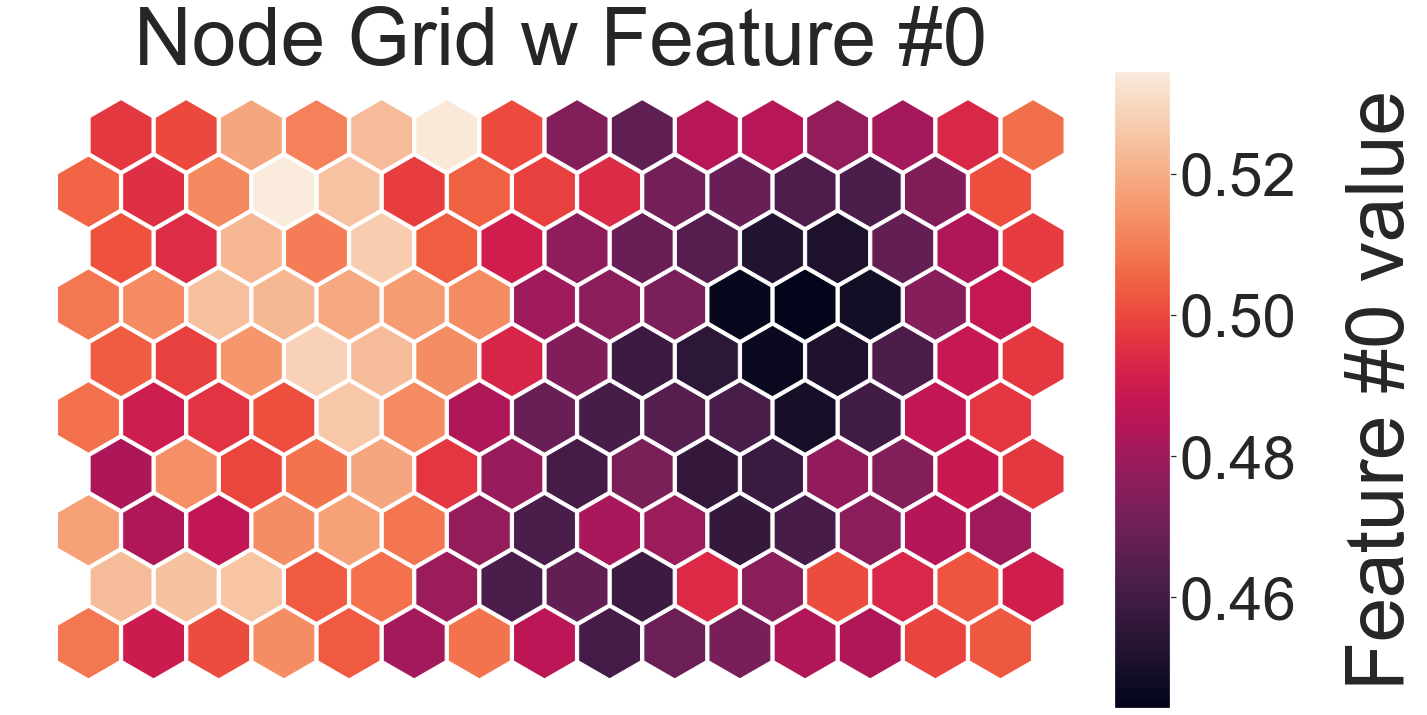

In [372]:
net.nodes_graph(colnum=0)

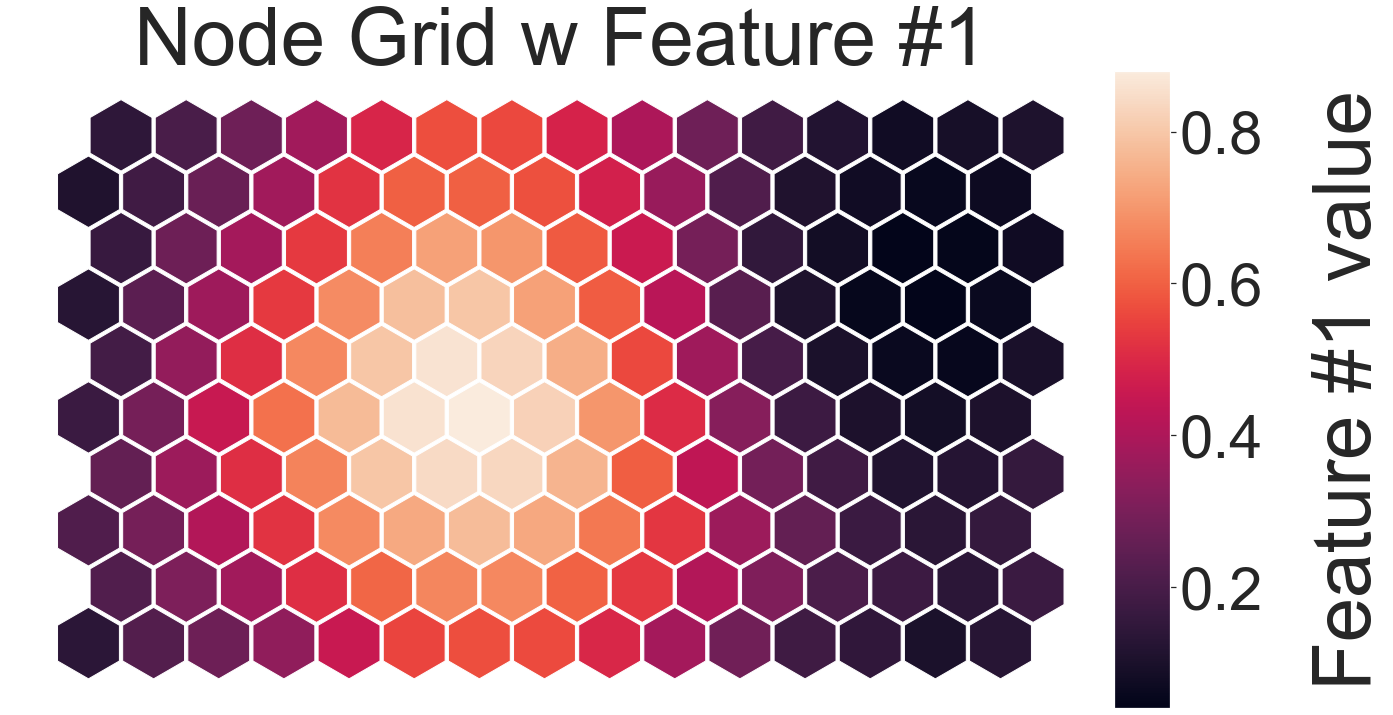

In [376]:
net.nodes_graph(colnum=1)

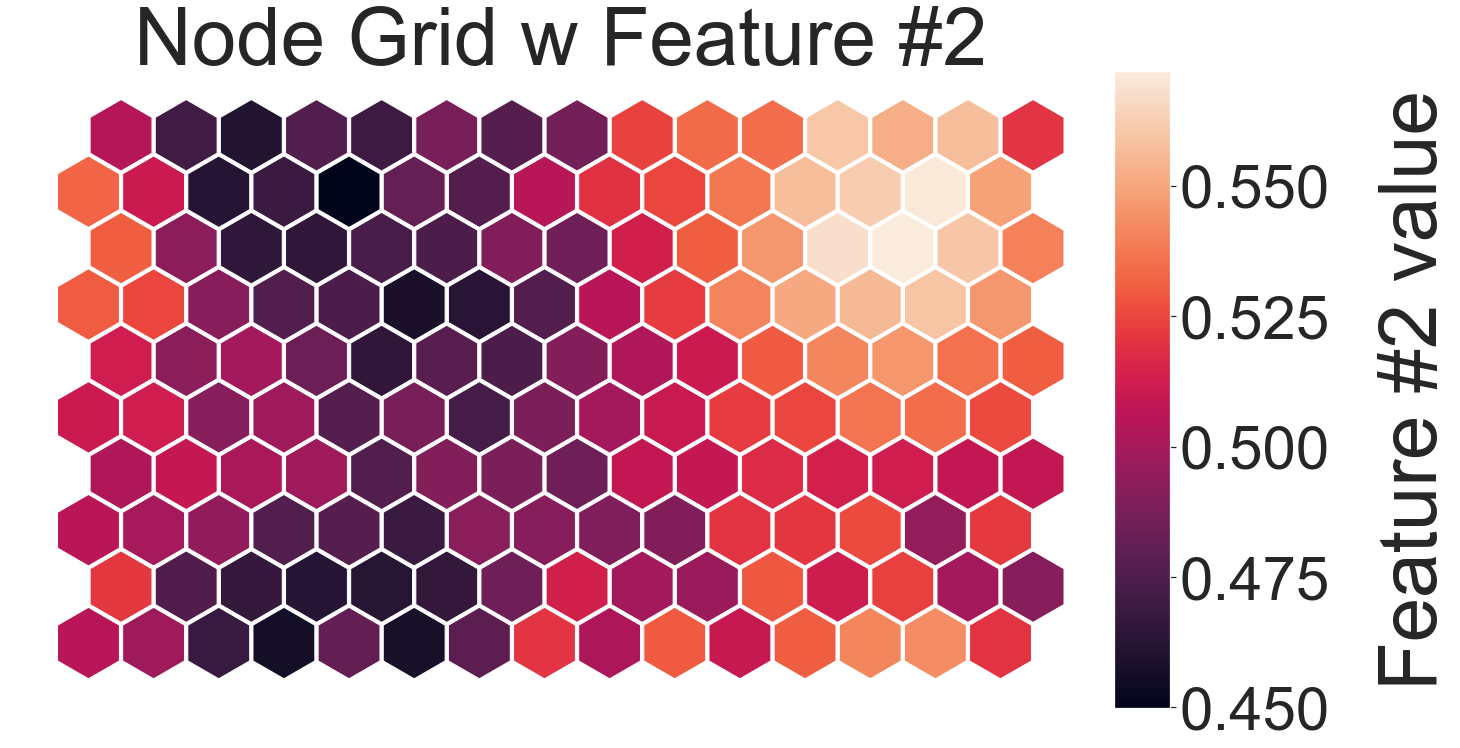

In [373]:
net.nodes_graph(colnum=2)

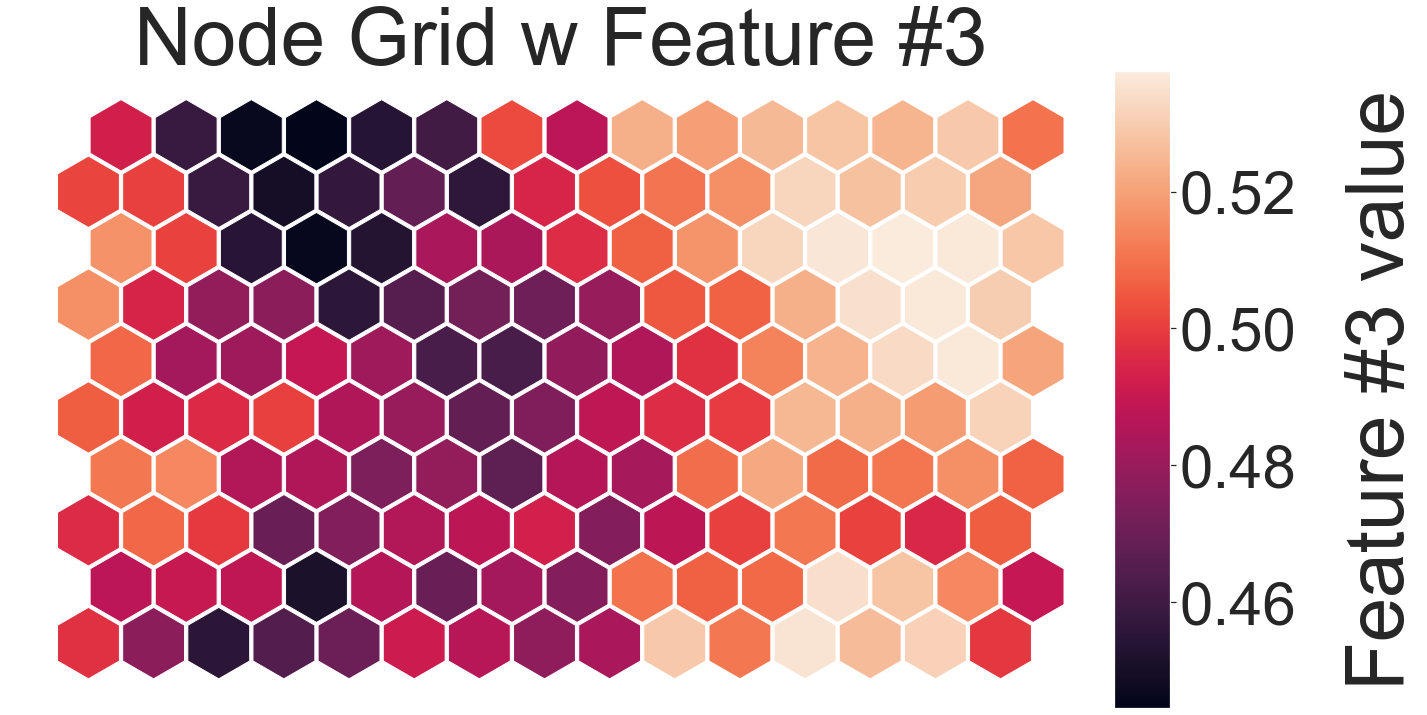

In [374]:
net.nodes_graph(colnum=3)

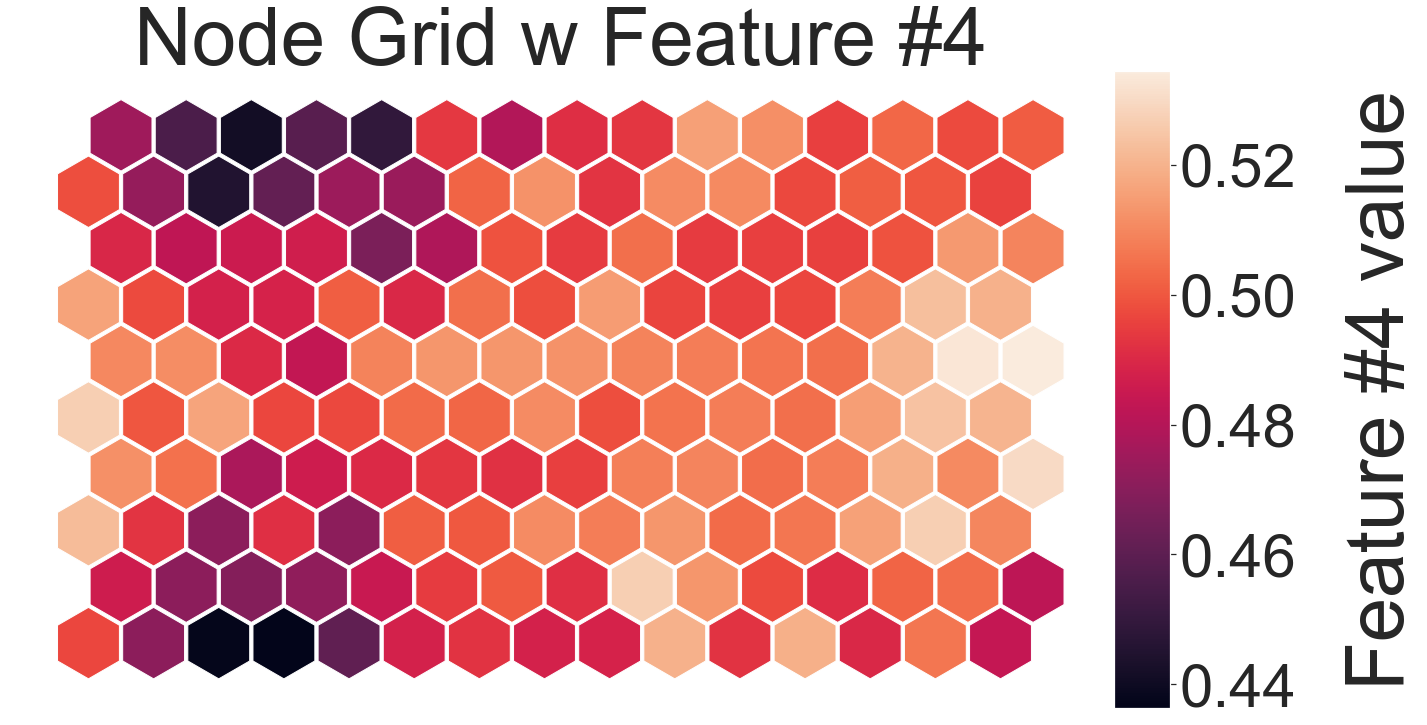

In [375]:
net.nodes_graph(colnum=4)

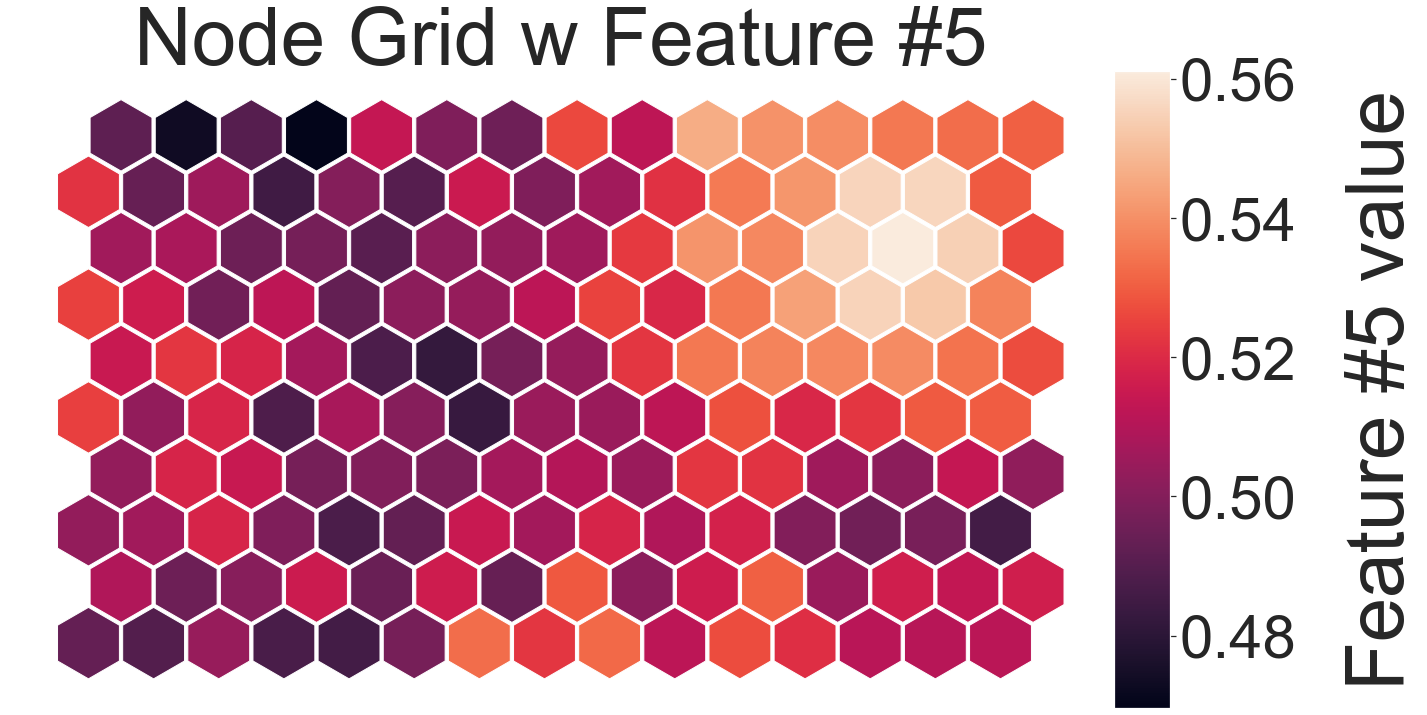

In [371]:
net.nodes_graph(colnum=5)

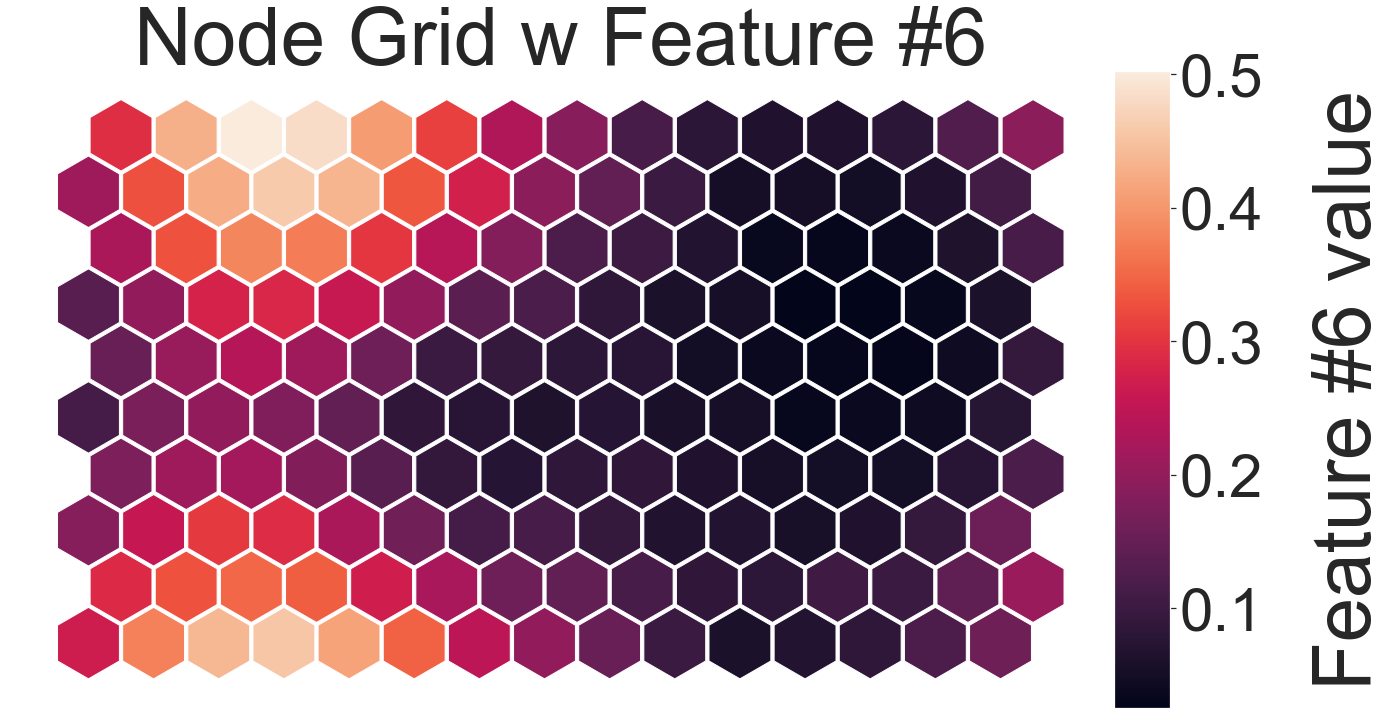

In [369]:
net.nodes_graph(colnum=6)

Построим карту удаленности весов, чтобы принять решение о количестве используемы кластеров.

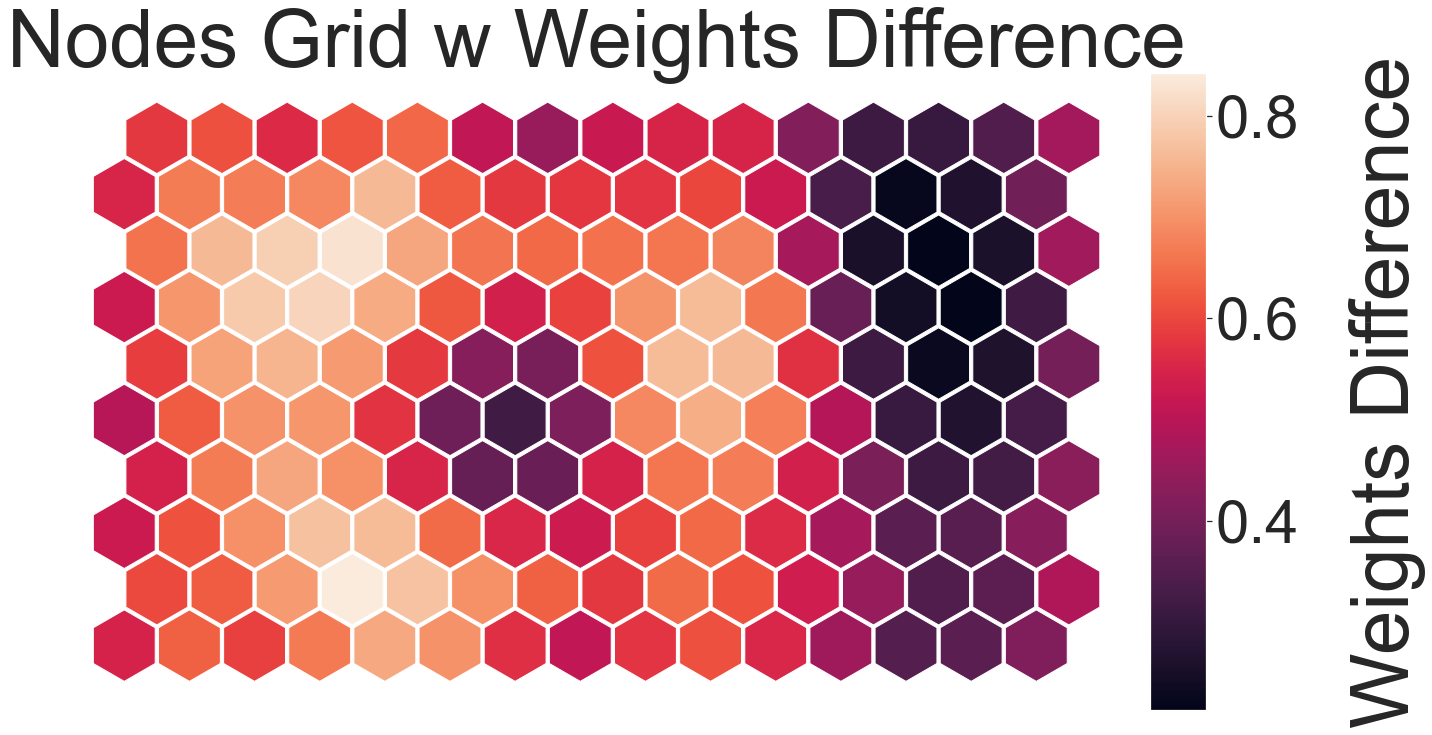

In [365]:
net.diff_graph()

Изобразим узлы карты, где видимо выделяются 3 кластера.

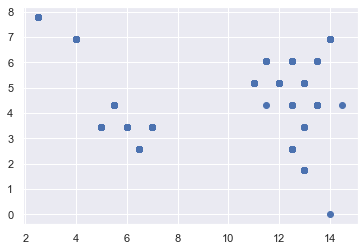

In [366]:
prj=np.array(net.project(X))
plt.scatter(prj.T[0],prj.T[1])
plt.show()

Применим к карте алгоритм К-средних, выделив 3 кластера и подав на обучение нашу карту.

In [367]:
# Fitting kmeans to SOM
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(prj)

Наконец сопоставим алгоритм К-средних с сетями Кохонена. Результаты пересекаются на 100%, что говорит о том, что мы можем выделять 3 кластера.

In [368]:
# Comparing Clustering Algorithms
from sklearn.metrics.cluster import adjusted_rand_score
adjusted_rand_score(km,kmeans.labels_)

1.0

Итог: была проведена работа по разбиению набора данных на кластеры. Изначально я посчитала,что оптимальным будет количеством кластеров равное 4, исходя из результатов специальных алгоритмов. Однако интерпретация полученных кластеров была довольно сложной. Я исключила из модели 3 самые невариативные характеристики, получила модель К-средних по 4-м кластерам и начала работу с сетями Кохонена. Здесь были испробованы разные размерности сетки, более оптимальной я решила оставить размерность 10х15, исходя из количества данных. Вопросы возникли при обучении НС, а точнее с выбором количества итераций. С увеличением их количества снижался процент пересечения данной модели с полученной ранее по алгоритму К-средних. Что скорее говорит о переобучении модели. Мне удалось добиться приемлемого результата при 20000 итераций, но вспомнив о том, что мы имеем дело не с большим количеством данных я решила остановиться на обучении в течении 1300 итераций. Обучив при этих параметрах НС, на карте стали выделятся 3 кластера. Изменив количество кластеров в модели К-средних с 4 на 3, мы имеем возможность сравнить результаты кластеризации 2-мя методами. Точность равна 100 процентам, а интерпретация по кластерам одного и другого метода сопоставима между собой. Поэтому я решаю оставить этот вариант.